ANÁLISIS EDA

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [81]:
df_limpio = pd.read_csv("C:/Users/Administrador/Desktop/RCM/Proyecto2-EDA-Ingresos-Publicos-Brasil/datos/concatenado_limpio.csv")

In [82]:
df_limpio.head()

,NOMBRE ÓRGANO SUPERIOR,NOMBRE ÓRGANO,NOMBRE UNIDAD GESTORA,CATEGORÍA ECONÓMICA,ORIGEN DE INGRESO,TIPO DE INGRESO,DETALLE,VALOR PREVISTO ACTUALIZADO,VALOR LANZADO,VALOR REALIZADO,PORCENTAJE REALIZADO,FECHA DE LANZAMIENTO,AÑO EJERCICIO
0,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,0.0,0.0,1297.13,0.0,31/12/2013,2013
1,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,0.0,0.0,26666621.42,0.0,31/12/2013,2013
2,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",OUTRAS MULTAS E JUROS DE MORA,0.0,0.0,301251.13,0.0,31/12/2013,2013
3,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIV.ATIVA POR INFRAÇÃO ADMINISTRATIVA,0.0,0.0,1855.58,0.0,31/12/2013,2013
4,Advocacia-Geral da União,Advocacia-Geral da União - Unidades com víncul...,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",OUTRAS RESTITUICOES,0.0,0.0,52140.68,0.0,31/12/2013,2013


Comenzamos calculando la distribunción de ingresos por categoria

In [83]:
distribucion_ingresos = df_limpio.groupby('CATEGORÍA ECONÓMICA').agg({'VALOR REALIZADO': 'sum','VALOR PREVISTO ACTUALIZADO': 'sum'}).reset_index()
# Calculamos el porcentaje de cada categoría en los ingresos totales
distribucion_ingresos['Porcentaje_Valor_Realizado'] = (distribucion_ingresos['VALOR REALIZADO'] / distribucion_ingresos['VALOR REALIZADO'].sum()) * 100
distribucion_ingresos['Porcentaje_Valor_Previsto'] = (distribucion_ingresos['VALOR PREVISTO ACTUALIZADO'] / distribucion_ingresos['VALOR PREVISTO ACTUALIZADO'].sum()) * 100

distribucion_ingresos


,CATEGORÍA ECONÓMICA,VALOR REALIZADO,VALOR PREVISTO ACTUALIZADO,Porcentaje_Valor_Realizado,Porcentaje_Valor_Previsto
0,Receitas Correntes,1.135448e+13,1.256245e+13,4.903515e+01,49.123285
1,Receitas Correntes - intra-orçamentárias,2.684376e+11,2.686059e+11,1.159268e+00,1.050337
2,Receitas de Capital,1.151280e+13,1.273145e+13,4.971889e+01,49.784113
3,Receitas de Capital - intra-orçamentárias,2.007285e+10,1.080841e+10,8.668608e-02,0.042264
4,Sem informação,3.030307e+04,0.000000e+00,1.308660e-07,0.000000


Esta distribución sugiere que ambas categorías principales (Correntes y Capital) tienen una contribución bastante equilibrada en el total de ingresos previstos y realizados.

Mientras que las otras categorías tienen un peso casi insignificante

Calculamos ahora la diferencia y la diferencia promedio entre ingresos previstos y realizados

In [84]:
distribucion_ingresos['Diferencia_Previsto_Realizado'] = distribucion_ingresos['VALOR PREVISTO ACTUALIZADO'] - distribucion_ingresos['VALOR REALIZADO']
diferencia_promedio = distribucion_ingresos[['CATEGORÍA ECONÓMICA', 'Diferencia_Previsto_Realizado']]
diferencia_promedio


,CATEGORÍA ECONÓMICA,Diferencia_Previsto_Realizado
0,Receitas Correntes,1.207976e+12
1,Receitas Correntes - intra-orçamentárias,1.683030e+08
2,Receitas de Capital,1.218646e+12
3,Receitas de Capital - intra-orçamentárias,-9.264437e+09
4,Sem informação,-3.030307e+04


Las dos categorías principales presentas una diferencia aproximada de 1.21 millones lo que sugiere que en ambas hubo una subejecucción de ingresos con respecto a lo previsto.

Para el análisis temporal, evaluaremos las tendencias de los ingresos realizados y previstos a lo largo del tiempo. Empezaremos con un análisis anual de las tendencias de ingresos.



In [85]:
# Agrupamos (con un groupby) por año y calculamos la suma de ingresos previstos y realizados
ingresos_por_anio = df_limpio.groupby('AÑO EJERCICIO').agg({
    'VALOR REALIZADO': 'sum',
    'VALOR PREVISTO ACTUALIZADO': 'sum'
}).reset_index()

ingresos_por_anio




,AÑO EJERCICIO,VALOR REALIZADO,VALOR PREVISTO ACTUALIZADO
0,2013,1.607763e+12,2.071914e+12
1,2014,2.133634e+12,2.248284e+12
2,2015,2.601736e+12,2.809879e+12
3,2016,2.528012e+12,2.755497e+12
4,2017,2.200378e+12,2.427185e+12
5,2018,2.671546e+12,3.335790e+12
6,2019,2.697940e+12,3.024303e+12
7,2020,3.156872e+12,2.887547e+12
8,2021,3.557911e+12,4.012919e+12


Vemos que solo en 2020 los Ingresos realizados superan a los previstos, lo que viene a confirmar la subejecución de ingresos que sospechabamos

No obstante vamos a profundizar más analizando la evolución mes a mes

In [86]:
# Extramos el mes de la columna "FECHA DE LANZAMIENTO"
df_limpio['FECHA DE LANZAMIENTO'] = pd.to_datetime(df_limpio['FECHA DE LANZAMIENTO'], errors='coerce')
df_limpio['MES'] = df_limpio['FECHA DE LANZAMIENTO'].dt.month
# Agrupamos por mes y calcular la suma de ingresos previstos y realizados
ingresos_por_mes = df_limpio.groupby('MES').agg({
    'VALOR REALIZADO': 'sum',
    'VALOR PREVISTO ACTUALIZADO': 'sum'
}).reset_index()



VISUALIZACIONES

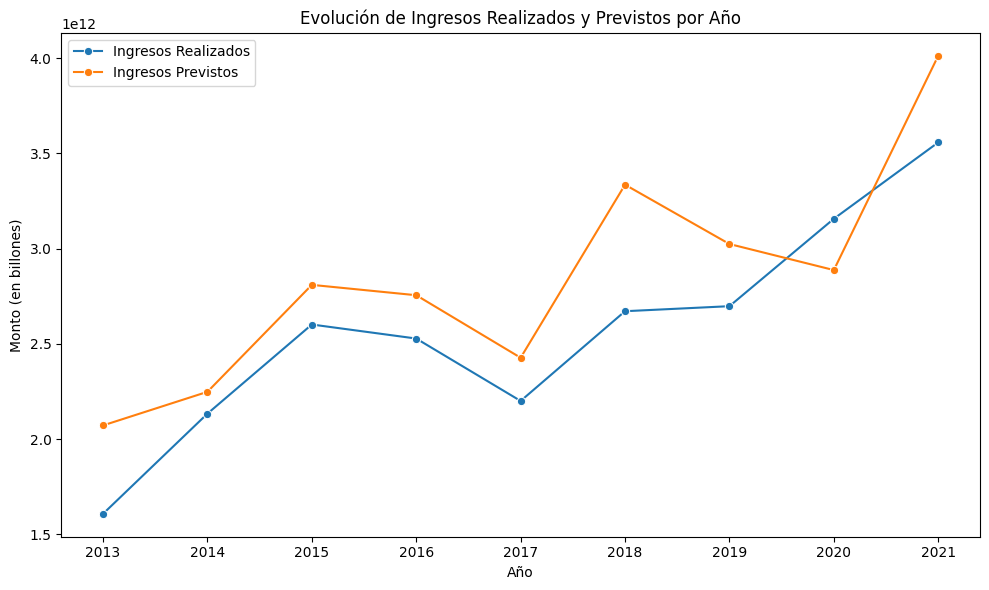

In [87]:
# Grafico de lineas de la evolución de los ingresos realizados y previstos por año
plt.figure(figsize=(10,6))

sns.lineplot(x='AÑO EJERCICIO', y='VALOR REALIZADO', data=ingresos_por_anio, label='Ingresos Realizados', marker='o', palette="set2")
sns.lineplot(x='AÑO EJERCICIO', y='VALOR PREVISTO ACTUALIZADO', data=ingresos_por_anio, label='Ingresos Previstos', marker='o', palette= "set2")

plt.title('Evolución de Ingresos Realizados y Previstos por Año')
plt.xlabel('Año')
plt.ylabel('Monto (en billones)')

plt.legend()
plt.tight_layout();
plt.show()



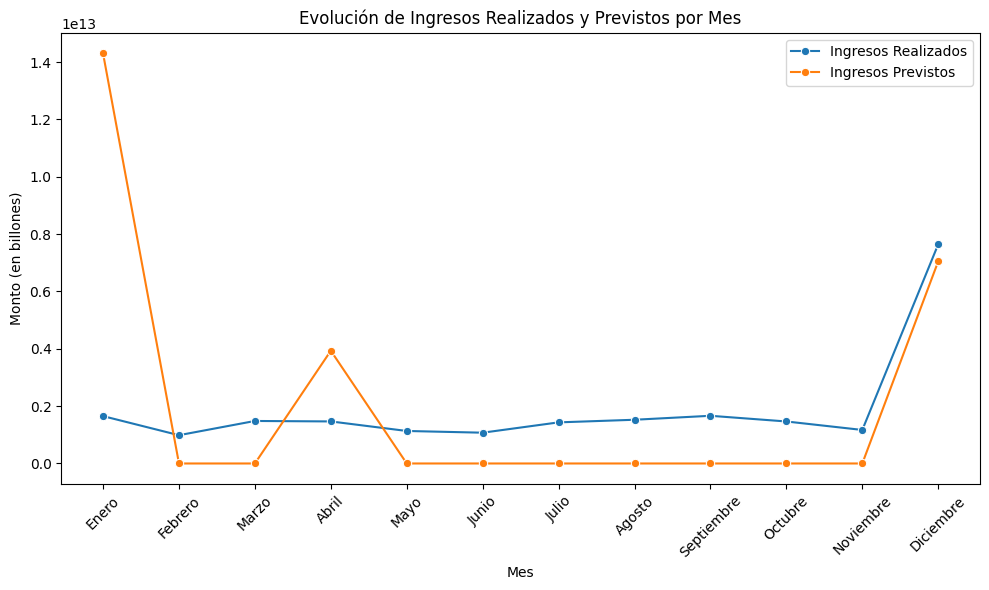

In [88]:
# Grafico de lineas de la evolución de los ingresos realizados y previstos por mes
plt.figure(figsize=(10,6))
sns.lineplot(x='MES', y='VALOR REALIZADO', data=ingresos_por_mes, label='Ingresos Realizados', marker='o', palette="set2")
sns.lineplot(x='MES', y='VALOR PREVISTO ACTUALIZADO', data=ingresos_por_mes, label='Ingresos Previstos', marker='o', palette="set2")

plt.title('Evolución de Ingresos Realizados y Previstos por Mes')
plt.xlabel('Mes')
plt.ylabel('Monto (en billones)')

plt.xticks(ticks=range(1, 13), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'])
plt.xticks(rotation=45) 

# Mostrar leyenda, grid y ajustar el layout

plt.tight_layout()  # Ajustar automáticamente el layout
plt.show()
